In [2]:
# P0 - Import
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

In [3]:
# P1 - Eigenvalues and eigenvectors
def find_eigen(matrix):
    if matrix.shape[0] == matrix.shape[1]:
        e_val, e_vec = np.linalg.eig(in_matrix)
        for i in range(len(e_val)):
            l = e_val[i]
            v = e_vec[:, i]
            if np.allclose(np.dot(matrix, v), l * v):
                print('Conditions satisfied')
            else:
                print('Conditions unsatisfied')
    else:
        print('Matrix should be NxN')


in_matrix = np.array([[1, 3], [5, -1]])
print(in_matrix)
find_eigen(in_matrix)

[[ 1  3]
 [ 5 -1]]
Conditions satisfied
Conditions satisfied


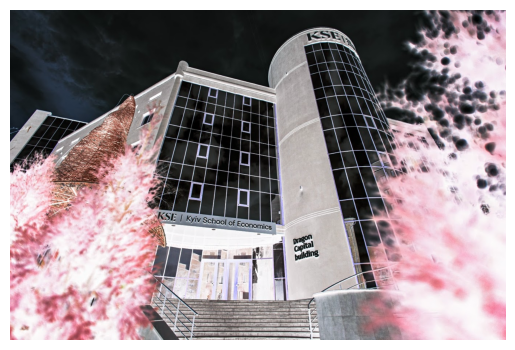

(905, 1360, 3)


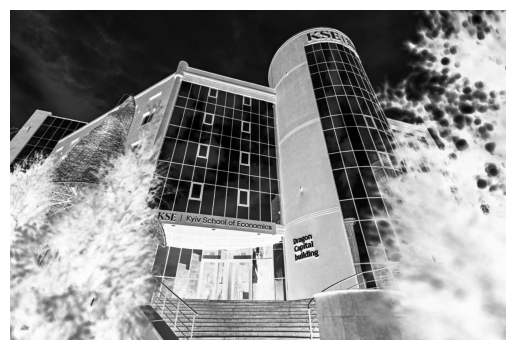

In [4]:
# P2.1 - Image and its vector
raw_image = cv2.imread('C:/Users/MB_6489/Desktop/building.jpg')
c_image = cv2.bitwise_not(raw_image)
plt.imshow(c_image)
plt.axis('off')
plt.show()

# P2.2 - Image into black and white
print(c_image.shape)
image_sum = c_image.sum(axis=2)
bw_image = image_sum/image_sum.max()
plt.imshow(bw_image, cmap='gray')
plt.axis('off')
plt.show()

Principal components needed to cover 95% of the variance -  72


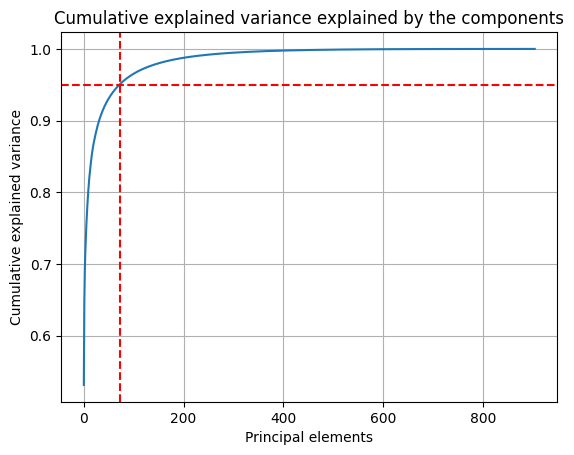

In [5]:
# P2.3 - PCA and 95% principal elements
pca = PCA()
pca.fit(bw_image)
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.sum(cumulative_var <= 0.95)
print('Principal components needed to cover 95% of the variance - ', n_components_95)
# P2.3 - 95% to principal elements
plt.plot(cumulative_var)
plt.xlabel('Principal elements')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance explained by the components')
plt.axvline(x=n_components_95, color="r", linestyle="--")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.grid(True)
plt.show()

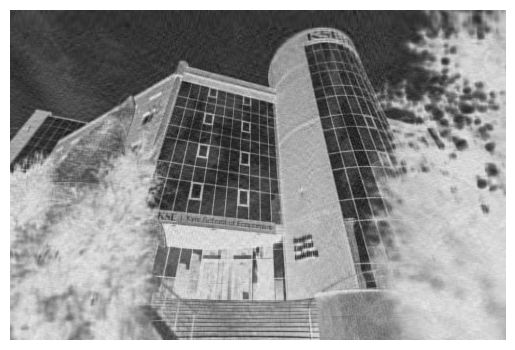

In [6]:
# P2.3 - 95% reconstruction
pca2 = PCA(n_components=n_components_95)
image_95 = pca2.inverse_transform(pca2.fit_transform(bw_image))
plt.imshow(image_95, cmap='gray')
plt.axis('off')
plt.show()

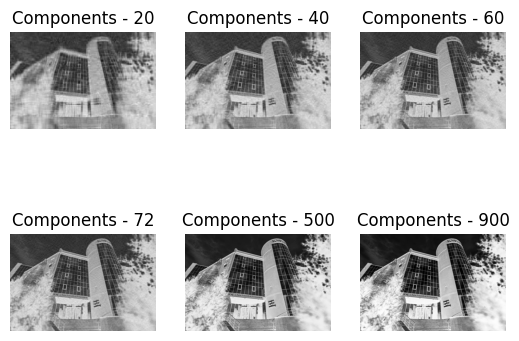

In [7]:
# P2.4 - Comparison for different principal components
def plot_for_n_pc(n, image):
    pca_n = PCA(n_components=n)
    image_n = pca_n.inverse_transform(pca_n.fit_transform(image))
    plt.axis('off')
    plt.imshow(image_n,cmap = 'gray')

pcs_to_compare = [20, 40, 60, n_components_95, 500, 900]

for m in range(len(pcs_to_compare)):
        plt.subplot(2, 3, m+1)
        plot_for_n_pc(pcs_to_compare[m], bw_image)
        plt.title('Components - '+str(pcs_to_compare[m]))


In [18]:
# P3 - Encryption function
def encrypt_message(message, key_matrix):
    num_vector = np.array([ord(char) for char in message])
    # print(num_vector)
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    # print(diagonalized_key_matrix)
    encrypted_vector = np.dot(diagonalized_key_matrix, num_vector)
    return encrypted_vector


def decrypt_message(encrypted_vector, key_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    decrypted_vector = np.dot(np.linalg.inv(diagonalized_key_matrix), encrypted_vector)
    decrypted_message = ''.join([chr(int(np.round(char))) for char in decrypted_vector])
    return decrypted_message


message_1 = 'Winter Is Coming'
key_matrix_1 = np.random.randint(0, 256, (len(message_1), len(message_1)))
en_message_1 = encrypt_message(message_1, key_matrix_1)
print(en_message_1)
decrypt_message(en_message_1, key_matrix_1)

[167352.-7.51304586e-12j 191691.-2.13147854e-11j 182110.-1.46487592e-11j
 189909.-6.16893172e-12j 152529.-2.04746270e-12j 198996.-1.38280033e-11j
 171538.-1.42020352e-11j 191389.-9.78062318e-12j 165514.-1.16642382e-11j
 202488.-1.57218890e-11j 175074.-5.35620611e-12j 188486.-9.43054930e-12j
 184036.-1.22875200e-11j 146279.-1.56093406e-11j 150085.-2.59059928e-12j
 201476.-1.69765671e-11j]


C:\Users\MB_6489\AppData\Local\Temp\ipykernel_14220\2633950407.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  decrypted_message = ''.join([chr(int(np.round(char))) for char in decrypted_vector])


'Winter Is Coming'